# 네이버 api 번역기 사용 방식

In [1]:
import requests

def get_translate_e2k(text): #영어를 한글로 번역하는 함수
    client_id = "k038Ur522FOy97b7bMCf" # <-- client_id 기입
    client_secret = "CIZzoba2C3" # <-- client_secret 기입

    data = {'text' : text,
            'source' : 'en',
            'target': 'ko'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)
        
def get_translate_k2e(text): #한글을 영어로 변환하는 함수
    client_id = "k038Ur522FOy97b7bMCf" # <-- client_id 기입
    client_secret = "CIZzoba2C3" # <-- client_secret 기입

    data = {'text' : text,
            'source' : 'ko',
            'target': 'en'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)

In [2]:
text_base='너 머리 예쁘다.'

text_en= get_translate_k2e(text_base)
print(text_en)
text_kr= get_translate_e2k(text_en)
print(text_kr)

Your hair is pretty.
머리 예쁘네요.


In [3]:
from gtts import gTTS
__author__ = 'info-lab'

tts = gTTS(
    text=text_kr, #음성으로 전환할 텍스트
    lang='ko', slow=False) #언어는 한글
tts.save('ex_ko.mp3')

---

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.DataFrame({'id':['a1','a2'],
                 'text_base':['나 사랑 너','나 목 아프다 병원 어디'],
                 'text_en':['I love you.', 'My throat hurts. Where in the hospital?'],
                'text_kr':['사랑해요','목이 아파요. 병원 어디에요?']})
df

,id,text_base,text_en,text_kr
0,a1,나 사랑 너,I love you.,사랑해요
1,a2,나 목 아프다 병원 어디,My throat hurts. Where in the hospital?,목이 아파요. 병원 어디에요?


# 수어 통계

In [6]:
print('수어 전체 개수: {}'.format(len(df)))
#수어 전체길이 확인
sl_length = df['text_kr'].astype(str).apply(len)
sl_length.head()

수어 전체 개수: 2


0     4
1    16
Name: text_kr, dtype: int64

In [7]:
#수어 통계 정보
print('수어 길이 최댓값: {}'.format(np.max(sl_length)))
print('수어 길이 최솟값: {}'.format(np.min(sl_length)))
print('수어 길이 평균값: {:.2f}'.format(np.mean(sl_length)))
print('수어 길이 표준편차: {:.2f}'.format(np.std(sl_length)))
print('수어 길이 중간값: {}'.format(np.median(sl_length)))
print('수어 길이 제1사분위: {}'.format(np.percentile(sl_length,25)))
print('수어 길이 제3사분위: {}'.format(np.percentile(sl_length,75)))

수어 길이 최댓값: 16
수어 길이 최솟값: 4
수어 길이 평균값: 10.00
수어 길이 표준편차: 6.00
수어 길이 중간값: 10.0
수어 길이 제1사분위: 7.0
수어 길이 제3사분위: 13.0


# wordcloud

In [8]:
# 문자열 아닌 데이터 모두 제거
sls = [signlanguage for signlanguage in df['text_base'] if type(signlanguage) is str]
#df['text_base']의 값중 문자이면 값을 출력
sls
#혹시 모를 문자가 아닌 부분 제거

['나 사랑 너', '나 목 아프다 병원 어디']

In [9]:
from eunjeon import Mecab
tagger = Mecab()

sl_nouns = [] #수어의 명사만 담을 리스트 생성
for sl in sls: #문자열인 수어 기본형에서 
    for noun in tagger.nouns(sl): #명사만을 
        sl_nouns.append(noun) #수어의 명사만을 담는 리스트로 담기
            
sl_nouns

['나', '사랑', '너', '나', '목', '병원', '어디']

In [10]:
from collections import Counter
# 시퀀스 자료형의 데이터 요소 개수를 딕셔너리 형태로 반환하는 자료구조
    # 요소 중 값이 같은 것이 몇 개인지 반환한다.
num_top_nouns = 6 #가장 많이 나온 명사 6개
sl_nouns_counter = Counter(sl_nouns) #명사의 게수를 센값
sl_top_nouns = dict(sl_nouns_counter.most_common(num_top_nouns)) # dict() 저장 
#많이 나온 상위 단어 6개을 센것
sl_top_nouns

{'나': 2, '사랑': 1, '너': 1, '목': 1, '병원': 1, '어디': 1}

In [11]:
from wordcloud import WordCloud

font = 'NanumBarunGothic.ttf'

sl_wc = WordCloud(background_color="white", font_path=font)
sl_wc.generate_from_frequencies(sl_top_nouns)

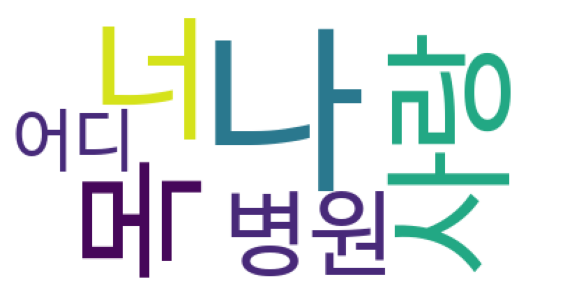

In [12]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(sl_wc)

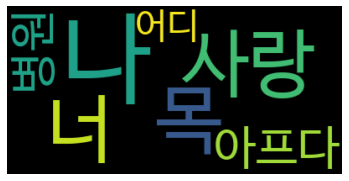

In [13]:
# 한글 폰트 설정
wordcloud = WordCloud(font).generate(' '.join(sls))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 감성 분석

In [14]:
dic1 = open('./dict/positive-words.txt')#긍정어
dic2 = open('./dict/negative-words.txt')#부정어

positive_words=[]
negative_words=[]

for line in dic1:
    positive_words.append(line.strip('\n'))# 긍정어를 담기
for line in dic2:
    negative_words.append(line.strip('\n'))#부정어를 담기

In [15]:
user_id = df.get('id') #df의 id열에 있는 값들
text_e = df.get('text_en')

slanguage = {user_id[0]:text_e[0]}
slanguage

{'a1': 'I love you.'}

In [16]:
for i in range(len(text_e)):#텍스트의 길이의 범위까지 숫자에서
    if slanguage.get(text_e[i]) != None:#만약 빈칸이 아니라면
        slanguage[user_id[i]] = slanguage.get(user_id[i]) + "\n" + text_e[i]
    else:
        slanguage[user_id[i]] = text_e[i]

slanguage.get('a1')

'I love you.'

In [17]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nadai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tokens=[]

for f, t in slanguage.items():
    token=word_tokenize(t)
    tokens.append([f,token])

In [19]:
tokens

[['a1', ['I', 'love', 'you', '.']],
 ['a2', ['My', 'throat', 'hurts', '.', 'Where', 'in', 'the', 'hospital', '?']]]

In [20]:
# 감정분석을 위해 각 토큰마다 긍정(+1), 부정(-1)로 계산
# 전체 단어의 수로 나누어 각 기업마다 긍정-부정 정도 계산

sentiment_user=[]

for token in tokens:
    
    u_id=token[0] #a1,a2
    sentiment=0
    count=0
    
    for t in token[1]: # ['I', 'love', 'you', '.']
        if t in positive_words:
            sentiment+=1
            count+=1
        elif t in negative_words:
            sentiment -=1
            count+=1
    if count==0:#중립어로만 이루어진 문장 대비
        count+=1
            
    
    sentiment_user.append([u_id,sentiment/count])

sentiment_user[0:10]

[['a1', 1.0], ['a2', -1.0]]

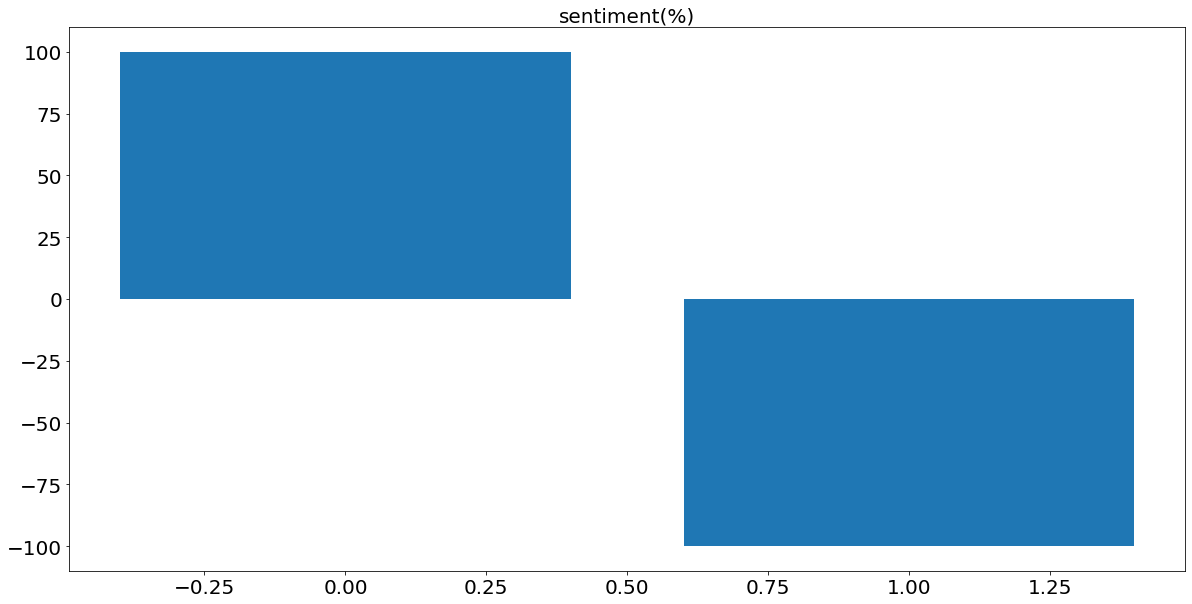

In [24]:
import numpy as np
import matplotlib.pyplot as plt

a=[]

for use in sentiment_user:
    a.append(use[1]*100)

X=np.arange(len(a))

plt.title("sentiment(%)",fontsize=20)
plt.bar(X,a)
plt.show()

In [25]:
# !pip install py_lex # 세분화된 감성분석 위한 라이브러리 

from py_lex import Liwc, EmoLex
import pandas as pd

# py_lex 감정어휘집 
emotion_dic=pd.read_excel('./dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')

df=emotion_dic.set_index('English (en)')

In [26]:
import matplotlib.pyplot as plt
import numpy as np

emotion_sl=[]

for token in tokens:
    u_id=token[0]
    sentiment=0
    count=0
    
    arr=[]
    senti_count=0
    
    for t in token[1]:
        if t in df.index:
            count+=1
            arr.append(list(df.loc[t]))
            if np.sum(list(df.loc[t]))!=0:
                senti_count+=1
    emotion_sl.append([u_id,np.sum(arr,axis=0),senti_count/count])

emotion_sl[0:10]

[['a1', array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 1.0],
 ['a2', array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1]), 0.5]]

In [27]:
emotion_result=[]

for firm in emotion_sl:
    emotion_result.append({"Firm" : firm[0],
                           "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Fear" : str("%0.2f"%( firm[1][5]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Joy" : str("%0.2f"%( firm[1][6]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sadness" : str("%0.2f"%( firm[1][7]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Surprise" : str("%0.2f"%( firm[1][8]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Trust" : str("%0.2f"%( firm[1][9]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sentiwords / non-sentiwords (%)":str("%0.2f"%(firm[2]*100))+"%"}
                          )
emotion_result[0:10]

C:\Users\nadai\AppData\Local\Temp/ipykernel_15864/1911870767.py:5: RuntimeWarning: invalid value encountered in long_scalars
  "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\nadai\AppData\Local\Temp/ipykernel_15864/1911870767.py:6: RuntimeWarning: invalid value encountered in long_scalars
  "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\nadai\AppData\Local\Temp/ipykernel_15864/1911870767.py:7: RuntimeWarning: invalid value encountered in long_scalars
  "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\nadai\AppData\Local\Temp/ipykernel_15864/1911870767.py:8: RuntimeWarning: invalid value encountered in long_scalars
  "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
C:\Users\nadai\AppData\Local\Temp/ipykernel_15864/1911870767.py:9: RuntimeWarning: invalid value encountered in long_scalars
  "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"

[{'Firm': 'a1',
  'Positive': '100.00%',
  'Negative': '0.00%',
  'Anger': '0.00%',
  'Anticipation': '0.00%',
  'Disgust': '0.00%',
  'Fear': '0.00%',
  'Joy': '100.00%',
  'Sadness': '0.00%',
  'Surprise': '0.00%',
  'Trust': '0.00%',
  'Sentiwords / non-sentiwords (%)': '100.00%'},
 {'Firm': 'a2',
  'Positive': 'nan%',
  'Negative': 'nan%',
  'Anger': 'nan%',
  'Anticipation': 'nan%',
  'Disgust': 'nan%',
  'Fear': 'inf%',
  'Joy': 'nan%',
  'Sadness': 'inf%',
  'Surprise': 'nan%',
  'Trust': 'inf%',
  'Sentiwords / non-sentiwords (%)': '50.00%'}]

In [28]:
# 3차원 시각화(세분화한 감정분석 결과 시각화 >> x, y, z)

y=[]

for sl in emotion_sl:
    y.append(list(sl[1][2:]))

x=['Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Suprise','Trust']

z=[]
for sl in emotion_sl:
    z.append(sl[0])

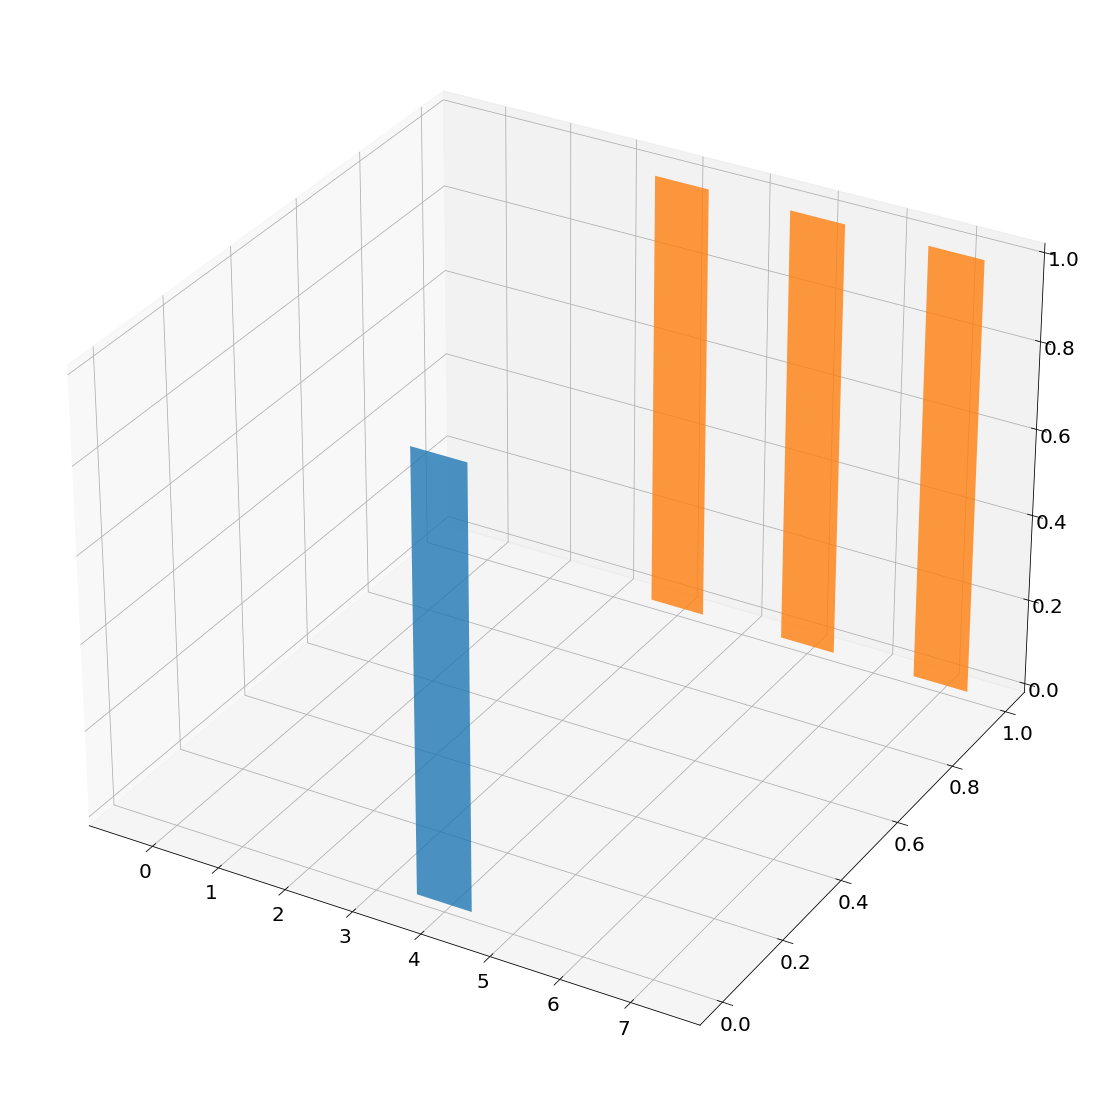

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
fig.set_size_inches(20, 20, 20)

ax = fig.add_subplot(111,projection='3d')

for sl in emotion_sl:
    xs=np.arange(8)

    ys=sl[1][2:]
    zs=emotion_sl.index(sl)
    ax.bar(xs,ys,zs,zdir='y',alpha=0.8)

plt.show()

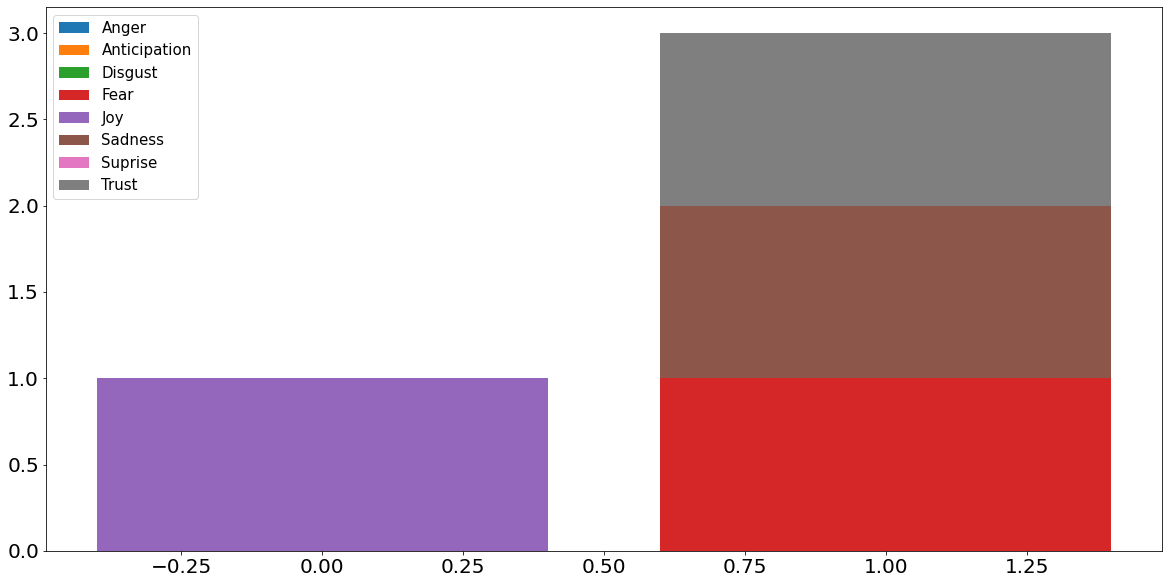

In [30]:
# 2차원 시각화 (세분화한 감정분석 결과 시각화, x: 기업, y: 감정)

E=[]

plt.rcParams["figure.figsize"]=(20,10)
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["legend.fontsize"]=15

for sl in emotion_sl:
    E.append(sl[1][2:])

a=np.transpose(E)

X=np.arange(len(a[0])) 

plt.bar(X,a[0],label='Anger')
plt.bar(X,a[1],bottom=a[0],label='Anticipation')
plt.bar(X,a[2],bottom=sum(a[0:2]),label='Disgust')
plt.bar(X,a[3],bottom=sum(a[0:3]),label='Fear')
plt.bar(X,a[4],bottom=sum(a[0:4]),label='Joy')
plt.bar(X,a[5],bottom=sum(a[0:5]),label='Sadness')
plt.bar(X,a[6],bottom=sum(a[0:6]),label='Suprise')
plt.bar(X,a[7],bottom=sum(a[0:7]),label='Trust')

plt.xlabel="Slanguage index"
plt.legend()
plt.show()